# WS 11 permutation_importance

* ermitteln Sie die Importance der Features der *Rohdaten* von `melb_data.csv` unter Einsatz von `sklearn.inspection.ermutation_importance`
* setzen Sie dazu minimales Feature Engineering wie folgt ein:
  * entfernen fragwürdiger Variablen: 'Unnamed: 0', 'Suburb', 'Address', 'SellerG', 'Postcode', 'Bedroom2', 'Date', 'CouncilArea'
  * One-Hot encoding aller verbleibenden kategorialen Variablen (der Parameter `dummy_na=True` von `pd.get_dummies()` erstellt auch Dummy-Variablen für NAs)
  * einsetzen von geschätzten Werten für NAs in verbleibenden numerischen Variablen mit `sklearn.impute.KNNImputer`
* danach:
  * features - target - split
  * **kein** train - test - split
  * ermitteln der Importance unter Einsatz von 
    * `sklearn.inspection.permutation_importance`
    * `sklearn.tree.DecisionTreeRegressor`
  * tabellarische und graphische Darstellung der Ergebnisse

In [4]:
## prepare env, read and prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#codepath = '../2_code'
#datapath = '../3_data'
codepath = '.././2_code'
datapath = '../../3_data'
from sys import path; path.insert(1, codepath)
from os import chdir; chdir(datapath)

In [5]:
## read data
data = pd.read_csv('melb_data.csv')

In [6]:
## drop columns
vars_to_drop = ['Unnamed: 0', 'Suburb', 'Address', 'SellerG', 'Postcode', 'Bedroom2', 'Date', 'CouncilArea']
data = data.drop(vars_to_drop, axis=1)

In [7]:
## one-hot encode (incl. NAs)
data = pd.get_dummies(data, drop_first=False, dummy_na=True)

In [8]:
## KNNImputer for NAs
from sklearn.impute import KNNImputer
imp = KNNImputer()
imp.fit(data)
data = pd.DataFrame(imp.transform(data), columns=data.columns)

In [9]:
## features - target - split
target = 'Price'
X = data.drop(target, axis=1)
y = data[target]

In [10]:
## permutation_importance
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X, y)

## permute features
from sklearn.inspection import permutation_importance
result = permutation_importance(
    model, X, y, 
    n_jobs=-1)

In [11]:
## collect results in a dataframe, ordered by mean
results = pd.DataFrame({
    'feature': X.columns,
    'mean': result.importances_mean#,
    #'std': result.importances_std
})
results['mean'] = results['mean'] / sum(results['mean']) ## normalize
results = results.sort_values(by=['mean'], ascending=False)
print(results)

                                  feature          mean
5                            BuildingArea  2.485861e-01
6                               YearBuilt  1.183170e-01
25       Regionname_Southern Metropolitan  1.082372e-01
1                                Distance  9.935707e-02
4                                Landsize  9.344294e-02
2                                Bathroom  6.997257e-02
7                               Lattitude  6.409907e-02
8                              Longtitude  5.452580e-02
9                           Propertycount  3.890516e-02
0                                   Rooms  3.623637e-02
12                                 Type_u  2.365695e-02
14                              Method_PI  1.230567e-02
3                                     Car  1.205072e-02
10                                 Type_h  9.613704e-03
15                               Method_S  3.767363e-03
20        Regionname_Eastern Metropolitan  2.067090e-03
26        Regionname_Western Metropolitan  1.192

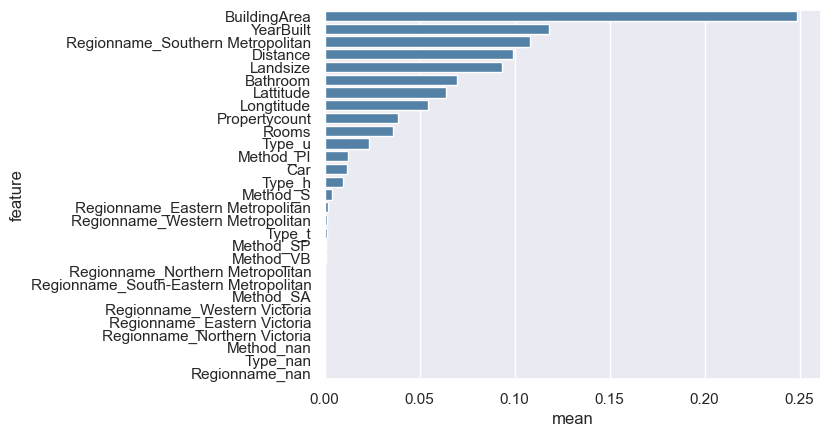

In [12]:
## visualize results
sns.barplot(x='mean', y='feature', data=results, color='steelblue');